# Preliminary Analysis

What does the data look like?

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

## Load Data

votes.csv downloaded from [Eurovision Dataset GitHub](https://github.com/Spijkervet/eurovision-dataset/releases/tag/2023)

In [3]:
filepath = "../data/votes.csv"
df = pd.read_csv(filepath)
df.head()

,year,round,from_country_id,to_country_id,from_country,to_country,total_points,tele_points,jury_points
0,1957,final,at,nl,at,nl,6,NaN,NaN
1,1957,final,at,fr,at,fr,0,NaN,NaN
2,1957,final,at,dk,at,dk,0,NaN,NaN
3,1957,final,at,lu,at,lu,3,NaN,NaN
4,1957,final,at,de,at,de,0,NaN,NaN


## Basic Info

In [4]:
df.describe()

,year,total_points,tele_points,jury_points
count,51354.000000,51354.000000,11741.000000,11715.000000
mean,2002.974199,3.121626,2.628056,2.628937
std,15.987289,4.401337,3.659772,3.660069
min,1957.000000,0.000000,0.000000,0.000000
25%,1994.000000,0.000000,0.000000,0.000000
50%,2008.000000,0.000000,0.000000,0.000000
75%,2015.000000,6.000000,5.000000,5.000000
max,2023.000000,24.000000,12.000000,12.000000


~51000 data points from 1957 to 2023 with country and vote numbers. ~11700 split into jury and television points. 

In [5]:
votes_df = pd.read_csv("../data/vote_distances.csv")
votes_df

,Unnamed: 0,year,round,from_country,to_country,total_points,tele_points,jury_points,from_capital,to_capital,distance
0,0,1957,final,at,nl,6,NaN,NaN,Vienna,Amsterdam,935.926496
1,1,1957,final,at,fr,0,NaN,NaN,Vienna,Paris,1036.040752
2,2,1957,final,at,dk,0,NaN,NaN,Vienna,København,871.969165
3,3,1957,final,at,lu,3,NaN,NaN,Vienna,Luxembourg,765.856559
4,4,1957,final,at,de,0,NaN,NaN,Vienna,Berlin,524.812724
...,...,...,...,...,...,...,...,...,...,...,...
51349,51349,2023,final,wld,al,6,6.0,NaN,NaN,Tirana,NaN
51350,51350,2023,final,wld,pt,0,0.0,NaN,NaN,Lisbon,NaN
51351,51351,2023,final,wld,rs,0,0.0,NaN,NaN,Belgrade,NaN
51352,51352,2023,final,wld,gb,0,0.0,NaN,NaN,London,NaN


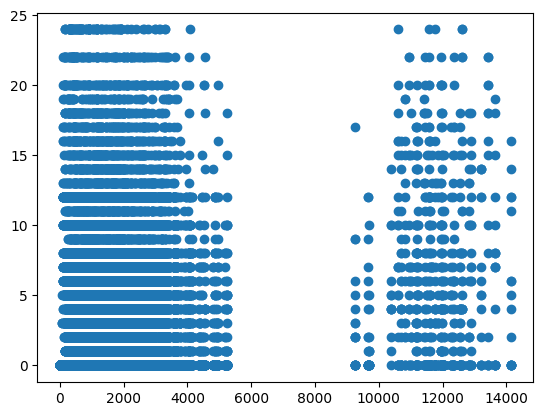

In [6]:
plt.scatter(votes_df["distance"], votes_df["total_points"])

(array([23143., 21207.,  5328.,   454.,     0.,     0.,    55.,   189.,
          385.,    99.]),
 array([    0.        ,  1414.1703915 ,  2828.34078301,  4242.51117451,
         5656.68156602,  7070.85195752,  8485.02234902,  9899.19274053,
        11313.36313203, 12727.53352354, 14141.70391504]),
 <BarContainer object of 10 artists>)

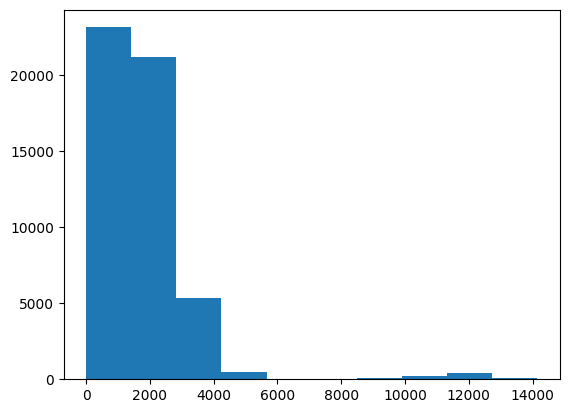

In [7]:
plt.hist(votes_df["distance"])

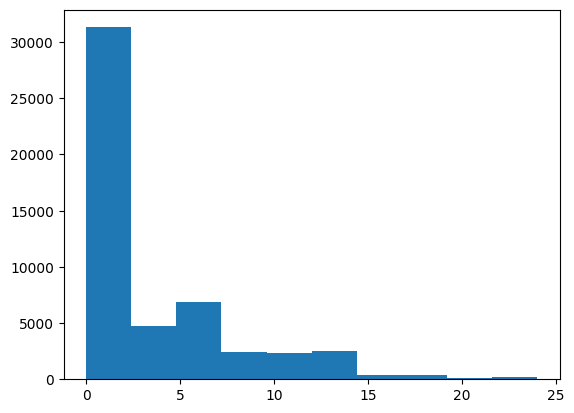

In [13]:
plt.hist(votes_df["total_points"])
plt.show()

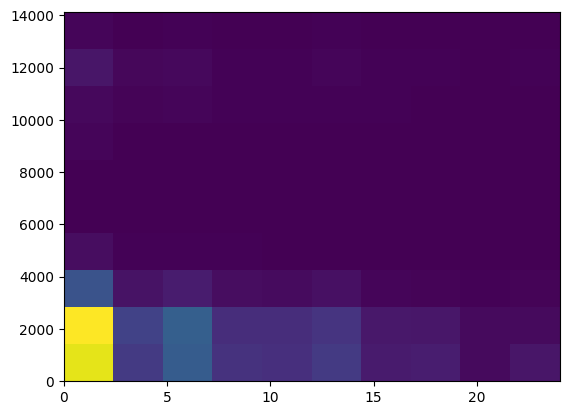

In [14]:
plt.hist2d(votes_df.dropna()["total_points"], votes_df.dropna()["distance"])
plt.show()

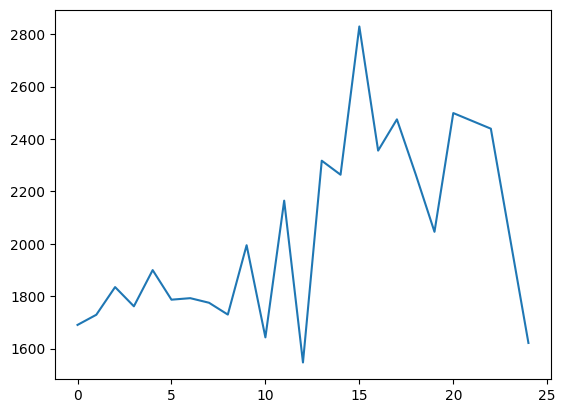

In [18]:
avg_dist = votes_df.groupby("total_points")["distance"].mean()
plt.plot(avg_dist)
plt.show()

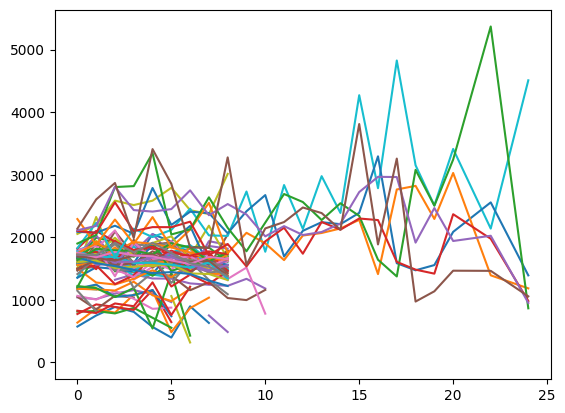

In [28]:
avg_dist = votes_df.groupby(["total_points", "year"])["distance"].mean()
avg_dist.unstack()
plt.plot(avg_dist.unstack())
# plt.show()

(array([[ 22.,  26.,  30.,  26.,  31.,  30.,  35.,  22.,   0.,  27.,  17.],
        [ 30.,  27.,  33.,  33.,  37.,  23.,  33.,  17.,   0.,  27.,  24.],
        [ 28.,  24.,  38.,  29.,  33.,  31.,  29.,  35.,   0.,  32.,  27.],
        [ 30.,  28.,  28.,  39.,  31.,  31.,  23.,  34.,   0.,  35.,  26.],
        [ 24.,  27.,  26.,  27.,  32.,  34.,  32.,  41.,   0.,  43.,  31.],
        [ 18.,  30.,  30.,  30.,  37.,  37.,  34.,  42.,   0.,  50.,  44.],
        [ 17.,  25.,  28.,  28.,  34.,  29.,  40.,  49.,   0.,  38.,  38.],
        [ 30.,  25.,  24.,  32.,  24.,  39.,  33.,  47.,   0.,  46.,  62.],
        [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [ 19.,  23.,  31.,  32.,  20.,  37.,  42.,  51.,   0.,  51.,  67.],
        [ 20.,  20.,  23.,  31.,  30.,  34.,  39.,  42.,   0.,  48., 109.]]),
 array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.]),
 array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.]),
 <matplotlib.collectio

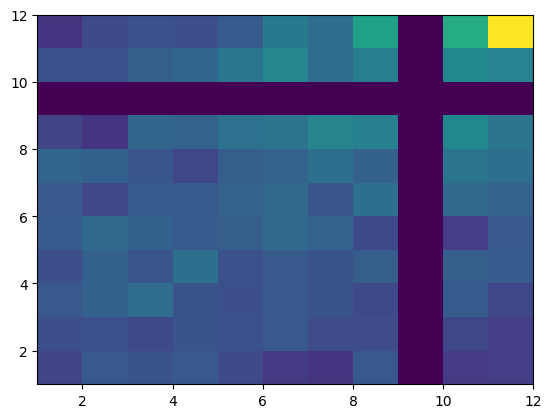

In [45]:
points_df = votes_df[["tele_points", "jury_points"]].dropna()
points_df = points_df[(points_df["jury_points"] > 0) & (points_df["tele_points"] > 0)]
plt.hist2d(points_df["tele_points"], points_df["jury_points"], bins=[11, 11])

In [49]:
points_df[points_df["tele_points"] == 10]

,tele_points,jury_points
39628,10.0,8.0
39668,10.0,8.0
39717,10.0,10.0
39743,10.0,7.0
39779,10.0,4.0
...,...,...
51016,10.0,10.0
51158,10.0,8.0
51228,10.0,8.0
51253,10.0,8.0
